Toan Bui A13599266
<br>
Kaylyn Han
<br>
Elise Wong A13026941

In [1]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from numpy import cov
from sklearn.utils import shuffle
import numpy as nps

In [2]:
data = {}
unzipped = gzip.open('Beeradvocate.txt.gz', 'rb')

ind = 0
currdat = {}
with unzipped as f:
    for line in f:
        clean = line.decode('utf-8')
        clean = clean.replace('\t', '')
        splitted = clean.replace('\n', '').split(':')

        if (len(splitted) == 1):
            data[f"{ind}"] = currdat
            currdat = {}
            ind = ind + 1
        
        else:
            currdat[f"{splitted[0]}"] = splitted[1].strip()

df= pd.DataFrame(data).transpose()

In [3]:
df.head()

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
0,5.00,47986,10325,Sausa Weizen,Hefeweizen,2.5,2,1.5,1.5,stcules,1.5,A lot of foam. But a lot.In the smell some ban...,1234817823
1,6.20,48213,10325,Red Moon,English Strong Ale,3,2.5,3,3,stcules,3,"Dark red color, light beige foam, average.In t...",1235915097
2,6.50,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3,2.5,3,3,stcules,3,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.00,47969,10325,Sausa Pils,German Pilsener,3.5,3,3,2.5,stcules,3,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.70,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4,4.5,4,4,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
#beer_dat = shuffle(beer_dat)

# use only the first 200000 data points from the dataset
beer_dat = df.copy()[:200000]
beer_dat.shape

(200000, 13)

In [5]:
# check the number of unique styles of beer
print(len(df['beer/style'].unique()))
print(len(beer_dat['beer/style'].unique()))

104
103


In [6]:
beer_dat['review/appearance'] = beer_dat['review/appearance'].apply(float)
beer_dat['review/aroma'] = beer_dat['review/aroma'].apply(float)
beer_dat['review/overall'] = beer_dat['review/overall'].apply(float)
beer_dat['review/palate'] = beer_dat['review/palate'].apply(float)
beer_dat['review/taste'] = beer_dat['review/taste'].apply(float)

## Part 1: Exploratory Analysis on Beer Dataset

In [7]:
beer_dat[:5]

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/profileName,review/taste,review/text,review/time
0,5.00,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot.In the smell some ban...,1234817823
1,6.20,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average.In t...",1235915097
2,6.50,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.00,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.70,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [8]:
print("The beer-review dataset contains " + str(len(beer_dat['beer/style'].unique())) + " unique types of beer\n")
print("Here are 5 most-reviewed types of beer: ")
top_5_beer = beer_dat['beer/style'].value_counts().head(5).to_frame() 
top_5_beer.columns = ['NUMBER OF REVIEWS']
top_5_beer

The beer-review dataset contains 103 unique types of beer

Here are 5 most-reviewed types of beer: 


,NUMBER OF REVIEWS
American IPA,24797
American Double / Imperial Stout,18077
American Double / Imperial IPA,13590
American Pale Ale (APA),9971
American Porter,6769


In [9]:
to_contain = 'American Double / Imperial Stout|American IPA|American Double / Imperial IPA|American Pale Ale \(APA\)|American Porter'
df_top_5 = beer_dat[beer_dat['beer/style'].str.contains(to_contain , na=False)]

In [10]:
df_top_5 = df_top_5.sort_values(by=['beer/style']) 
df_top_5 = df_top_5.reset_index() 
df_top_5.drop('index', axis=1, inplace=True)

beer_styles = ['American Double / Imperial Stout', 'American IPA', 'American Double / Imperial IPA','American Pale Ale (APA)','American Porter']
beer_ratings = [0,0,0,0,0]
appearance_rating_dict = dict(zip(beer_styles,beer_ratings)) 
palate_rating_dict = dict(zip(beer_styles,beer_ratings)) 
aroma_rating_dict = dict(zip(beer_styles,beer_ratings)) 
taste_rating_dict = dict(zip(beer_styles,beer_ratings)) 
overall_rating_dict = dict(zip(beer_styles,beer_ratings))

for style in beer_styles:
    appearance_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/appearance'].mean(),2) 
    palate_rating_dict[style] = round(df_top_5[df_top_5['beer/style']== style]['review/palate'].mean(),2)
    aroma_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/aroma'].mean(),2)
    taste_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/taste'].mean(),2)
    overall_rating_dict[style] = round(df_top_5[df_top_5['beer/style']== style]['review/overall'].mean(),2)
    
appearance_rating_df = pd.Series(appearance_rating_dict).to_frame() 
palate_rating_df = pd.Series(palate_rating_dict).to_frame() 
aroma_rating_df = pd.Series(aroma_rating_dict).to_frame() 
taste_rating_df = pd.Series(taste_rating_dict).to_frame() 
overall_rating_df = pd.Series(overall_rating_dict).to_frame()

In [11]:
appearance_rating_df.columns = ['Appearance Rating'] 
palate_rating_df.columns = ['Palate Rating'] 
aroma_rating_df.columns = ['Aroma Rating'] 
taste_rating_df.columns = ['Taste Rating'] 
overall_rating_df.columns = ['Overall Rating']

ratings_df = pd.concat([appearance_rating_df, palate_rating_df], axis= 1, join='inner')
ratings_df = pd.concat([ratings_df, aroma_rating_df], axis=1, join='inner')
ratings_df = pd.concat([ratings_df, taste_rating_df], axis=1, join='inner')
ratings_df = pd.concat([ratings_df, overall_rating_df], axis=1, join='inner')

print("\nAn Overview of the Ratings for the 5 Most-reviewed Beer Types ")
#The dataframe that contains all the individual ratings ratings_df ## THIS CONTAINS THE AVERAGE RATINGS

ratings_df


An Overview of the Ratings for the 5 Most-reviewed Beer Types 


,Appearance Rating,Palate Rating,Aroma Rating,Taste Rating,Overall Rating
American Double / Imperial Stout,4.21,4.19,4.27,4.30,4.13
American IPA,4.08,3.98,4.01,4.06,4.08
American Double / Imperial IPA,4.05,3.99,4.07,4.05,3.95
American Pale Ale (APA),3.80,3.71,3.67,3.76,3.91
American Porter,3.93,3.80,3.84,3.92,3.92


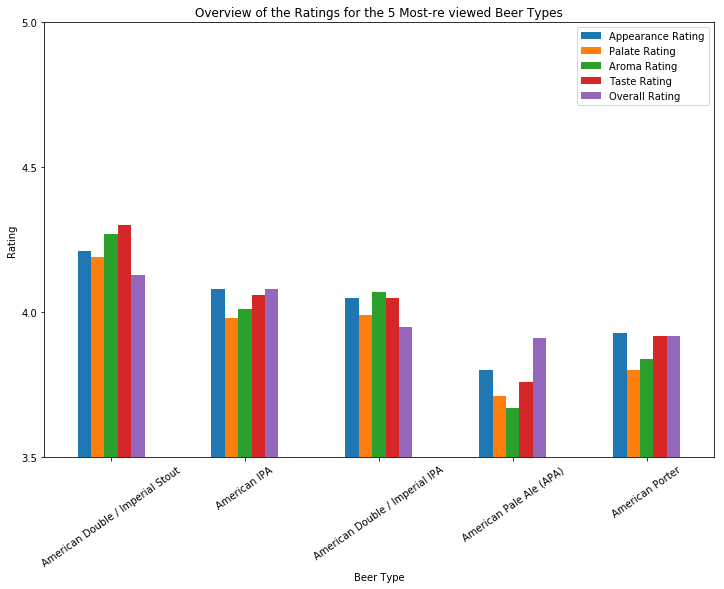

In [12]:
ratings_df.plot.bar(title = 'Overview of the Ratings for the 5 Most-re viewed Beer Types',figsize= (12,8))
labels = [3.5, 4.0, 4.5, 5.0]
plt.yticks(labels)
plt.ylim(3.5,5) 
plt.xticks(rotation = 35) 
plt.xlabel("Beer Type") 
plt.ylabel("Rating") 
plt.show()

## Observation:
From the bar chart above, we can see that "American Double/Imperial Stout" is the beer type that receives the highest review in all categories (appearance, palate, aroma, taste and overall)

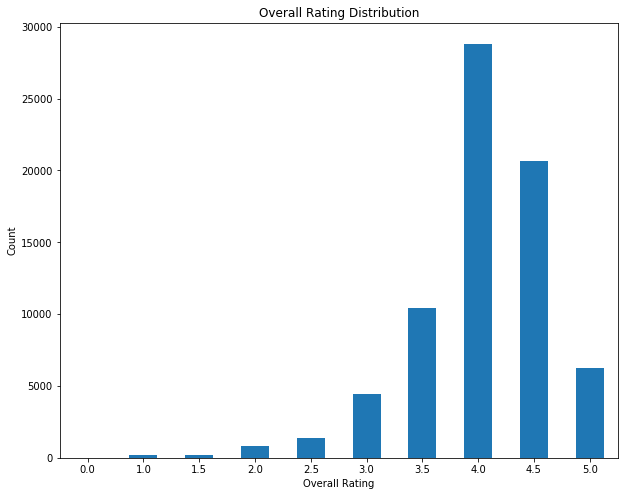

In [13]:
df_top_5['review/overall'].value_counts().sort_index().plot('bar',title = 'Overall Rating Distribution',figsize= (10,8), color='#1f77b4')
plt.xticks(rotation = 0)
plt.xlabel("Overall Rating")
plt.ylabel("Count") 
plt.show()

## Observation:
From the bar chart above, we can see that people tend to give an overall rating of 4.0 for the 5 most-popular beer styles. This means that the most-reviewed beers also tend to receive a relatively high overall rating.

In [14]:
df_top_5 = df_top_5[['review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'review/overall']]
data = df_top_5.sample(frac=1) ## random shuffle the dataframe ( not in place)

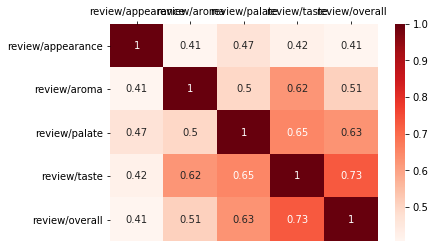

In [15]:
#Using Pearson Correlation plt.figure(figsize=(10,10))
cor = data.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
ax.xaxis.set_ticks_position('top')
loc, labels = plt.yticks() 
ax.set_yticklabels(labels, rotation=0)
plt.show()

## OBSERVATION:
Based on the correlation matrix above, we can see that taste correlates the most (corr = 0.72) with the overall beer rating, meaning that taste is the most important feature of a beer.

## Part 2: Predictive Task

### Predicting Overall Beer Rating from Taste, Appearance, Aroma and Palate Ratings

- Data is split into train and test set (80:20 ratio)

- Using the ratings for the four features (taste, appearance, aroma and palate), we will use first use linear regression to predict the overall rating for each beer style. This will serve as the baseline predictor that we will improve upon

In [16]:
beer_dat = shuffle(beer_dat)

#train-test split
train_size = int(len(beer_dat)*float(0.5))
valid_size = int(len(beer_dat)*float(0.25))
test_size = int(len(beer_dat)*float(0.25))
                 
trainX = beer_dat[:train_size]
trainY = beer_dat['review/overall'][:train_size] 

validX = beer_dat[train_size:train_size + valid_size]
validY = beer_dat['review/overall'][train_size:train_size + valid_size]

testX = beer_dat[(train_size + valid_size):(train_size + valid_size + test_size)] 
testY = beer_dat['review/overall'][(train_size + valid_size):(train_size + valid_size + test_size)]         

print(len(trainX), len(validX), len(testX))

100000 50000 50000


In [17]:
# Create dictionary of top five beers to use for one hot encoding
topfive = trainX['beer/style'].value_counts().index[:5]
fivedict = dict(zip(topfive, [0, 1, 2, 3, 4]))

def pick_feature(datum): 
    feat=[]
    feat.append( datum['review/taste']) 
    feat.append( datum['review/palate']) 
    feat.append( datum['review/aroma']) 
    feat.append( datum['review/appearance'])
    
    
    # one hot encoding for top 5 beer styles
    empty = [0, 0, 0, 0, 0]
    style = datum['beer/style']
    if (style in topfive):
        empty[fivedict[style]] = 1
        
    feat.extend(empty)
    
    return feat

In [18]:
# Create training feature matrix
train_feat = []
for index, row in trainX.iterrows():
    train_feat.append(pick_feature(row))
    
# Create valid feature matrix
valid_feat = []
for index, row in validX.iterrows():
    valid_feat.append(pick_feature(row))

In [19]:
model = LinearRegression()
model.fit(train_feat, trainY)


train_pred = model.predict(train_feat)
#Returns the coefficient of determination R^2 of the prediction.
print(model.score(train_feat, trainY))
# Print MSE and MAE to compare
print(mean_squared_error(trainY, train_pred))
print(mean_absolute_error(trainY, train_pred))

print('\n')


valid_pred = model.predict(valid_feat)
#Returns the coefficient of determination R^2 of the prediction.
print(model.score(valid_feat, validY))
# Print MSE and MAE to compare
print(mean_squared_error(validY, valid_pred))
print(mean_absolute_error(validY, valid_pred))

0.6500951187730601
0.1677747253015267
0.3074242095536989


0.6520721517446488
0.16757429530075726
0.30686926211496984


In [21]:
#after predicting the overall beer rating, decide a threshold to calculate accuracy of beer prediction
# ?!!!!!!!!
# smaller than THRESHOLD === accurate prediction
# for now, set threshold to be 0.4, given ratings range from 0 - 5

threshold = 0.4
diff = abs(testY - valid_pred)
sum(diff <= threshold)/len(diff)

0.38662

In [22]:
diff

87534     0.794906
175726    0.082180
69598     0.344598
17677     0.294757
137256    0.612640
118460    0.081822
20585     0.415671
142244    0.581616
82546     0.153066
6472      0.471246
194044    0.410859
153488    0.001766
49106     0.452699
163005    0.910859
197726    0.266878
120387    0.483517
2747      1.713452
112913    0.049776
168616    0.276674
163587    0.407462
154977    0.082180
133957    1.454320
181771    1.710493
27159     0.794757
29765     0.006125
134114    0.503650
88223     0.664385
64883     0.217811
23798     0.483517
57255     0.084350
            ...   
150965    0.854035
198066    0.786548
69541     0.168215
149506    0.190844
61636     1.364752
88707     0.377001
40519     0.971246
119066    1.917820
172271    0.008631
78302     1.893042
5654      0.051362
79457     0.463036
134890    0.436598
167864    0.559214
102496    0.291172
72321     0.699033
63970     0.710946
213       0.399066
144022    0.544795
162960    0.319514
102635    0.882378
146631    0.